<a href="https://colab.research.google.com/github/nhattminh160901/Do_An_2022/blob/main/doan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [877]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [878]:
data = pd.read_csv("https://raw.githubusercontent.com/nhattminh160901/Do_An_2022/main/insurance.csv")

In [879]:
df = pd.DataFrame(data)

In [880]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [881]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [882]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [883]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [884]:
non_smoker_df = df[df["smoker"] == "no"]
smoker_df = df[df["smoker"] == "yes"]

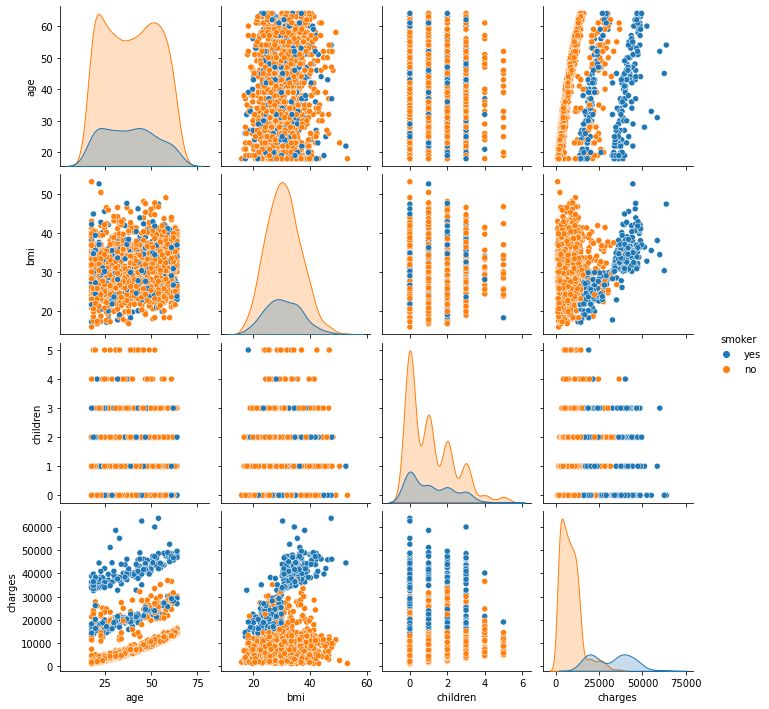

In [885]:
sns.pairplot(df, hue="smoker")
plt.show()

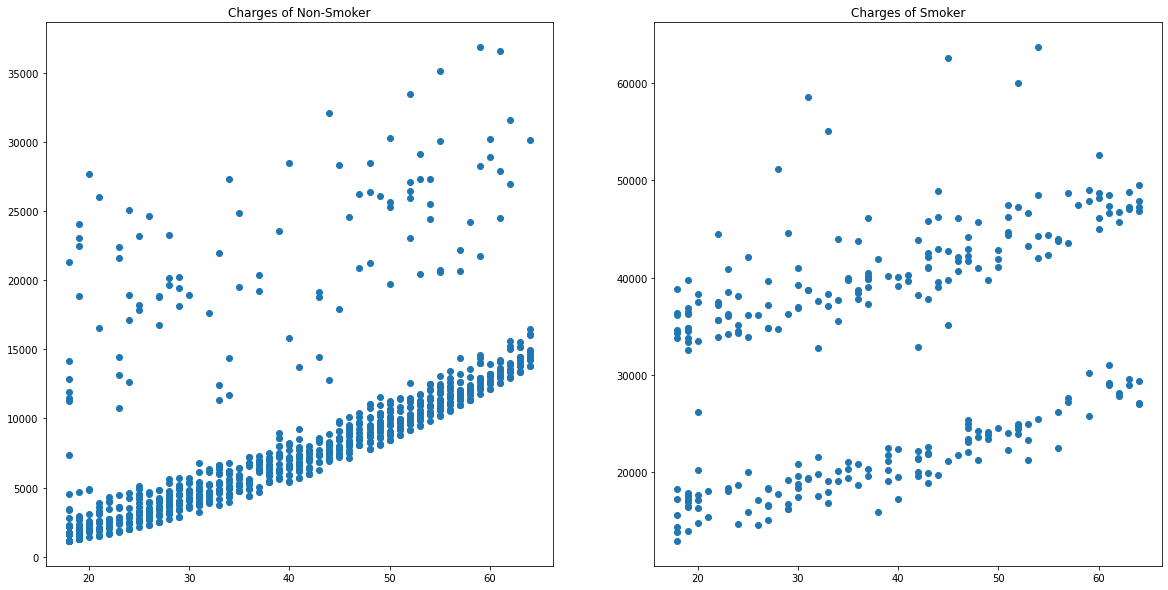

In [886]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20, 10))

axes[0].scatter(data=non_smoker_df, x="age", y="charges")
axes[0].set_title("Charges of Non-Smoker")

axes[1].scatter(data=smoker_df, x="age", y="charges")
axes[1].set_title("Charges of Smoker");

Non Smoker

In [488]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.optimize import curve_fit

def rmse(targets, predictions):
    return np.sqrt(mean_squared_error(targets, predictions, squared=False))

In [821]:
non_smoker_x, non_smoker_y = non_smoker_df.age.values.reshape(-1, 1), non_smoker_df.charges.values

In [822]:
x = np.arange(min(non_smoker_x), max(non_smoker_x)+1, 1)
x = x.reshape(-1, 1)

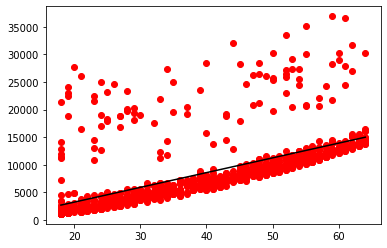

In [823]:
lnregr = linear_model.LinearRegression().fit(non_smoker_x, non_smoker_y)
plt.scatter(non_smoker_x, non_smoker_y, color="red")
plt.plot(x, lnregr.predict(x), color="black")

In [824]:
coefficient = lnregr.coef_
coefficient

array([267.24891283])

In [825]:
non_smoker_df = non_smoker_df[non_smoker_df["charges"]< non_smoker_df["age"]*coefficient]

Text(0.5, 1.0, 'Charges of Non-Smoker after exception outlier')

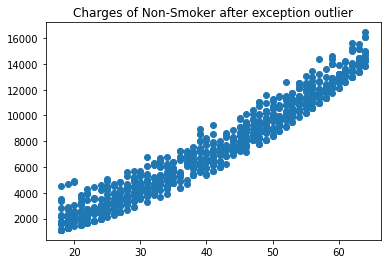

In [826]:
plt.scatter(data=non_smoker_df, x="age", y="charges")
plt.title("Charges of Non-Smoker after exception outlier")

In [827]:
non_smoker_x, non_smoker_y = non_smoker_df.age.values.reshape(-1, 1), non_smoker_df.charges.values

In [828]:
dataset = np.concatenate((non_smoker_x, non_smoker_y.reshape(-1, 1)), axis=1)

In [829]:
np.random.shuffle(dataset)
sfdt = np.array_split(dataset, 10)

In [830]:
train = np.concatenate(sfdt[:7])
test = np.concatenate(sfdt[7:])
x_train, y_train = train[:, :1], train[:, 1]
x_test, y_test = test[:, :1], test[:, 1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((677, 1), (677,), (288, 1), (288,))

1. Linear Regression

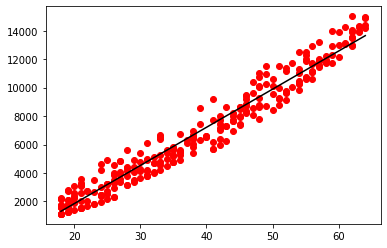

In [831]:
lnregr = linear_model.LinearRegression().fit(x_train, y_train)
y_pred = lnregr.predict(x)
plt.scatter(x_test, y_test, color="red")
plt.plot(x, y_pred, color="black")

In [832]:
rmse(y_test, lnregr.predict(x_test)), r2_score(y_test, lnregr.predict(x_test)), mean_absolute_error(y_test, lnregr.predict(x_test))

(28.062122158976226, 0.9592446440664713, 639.0281177011124)

2. Non-linear regression

In [833]:
def sigmoid(x, a, b):
  y = a*x**2+b*x
  return y

In [834]:
popt, pcov = curve_fit(sigmoid, x_train.reshape(-1), y_train)
popt

array([ 2.49071856, 68.71809602])

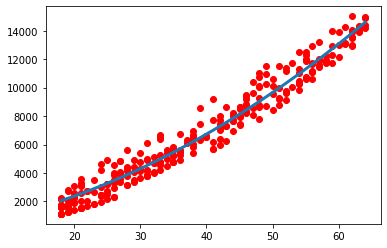

In [835]:
y = sigmoid(x, *popt) 
plt.scatter(x_test, y_test, color="red")
plt.plot(x, y, linewidth = 3.0)

In [836]:
rmse(y_test, sigmoid(x_test, *popt)), r2_score(y_test, sigmoid(x_test, *popt)), mean_absolute_error(y_test, sigmoid(x_test, *popt))

(27.388607607800633, 0.9630186753803331, 606.4097171050693)

3. Comparison

In [871]:
comparison_dt = {"Linear Regression":(rmse(y_test, lnregr.predict(x_test)), r2_score(y_test, lnregr.predict(x_test)), mean_absolute_error(y_test, lnregr.predict(x_test))),
        "Non-Linear Regression":(rmse(y_test, sigmoid(x_test, *popt)), r2_score(y_test, sigmoid(x_test, *popt)), mean_absolute_error(y_test, sigmoid(x_test, *popt)))}
comparison = pd.DataFrame(comparison_dt)
comparison.index = ["rmse", "r2_score", "mae"]
comparison

,Linear Regression,Non-Linear Regression
rmse,28.062122,27.388608
r2_score,0.959245,0.963019
mae,639.028118,606.409717


Smoker with Charges > 30000

In [838]:
smoker_df1 = smoker_df[smoker_df["charges"]>30000]

In [839]:
Q1 = smoker_df1["charges"].quantile(0.25)
Q3 = smoker_df1["charges"].quantile(0.75)
IQR = Q3 - Q1

In [840]:
smoker_df1 = smoker_df1[(Q1 - 1.5*IQR < smoker_df1["charges"]) &  (smoker_df1["charges"] < Q3 + 1.5*IQR)]

In [841]:
smoker_df1

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600


In [842]:
smoker_x1, smoker_y1 = smoker_df1.age.values.reshape(-1, 1), smoker_df1.charges.values

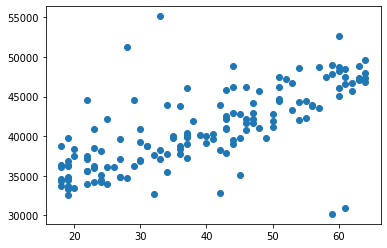

In [843]:
plt.scatter(smoker_x1, smoker_y1)

In [844]:
dataset1 = np.concatenate((smoker_x1, smoker_y1.reshape(-1, 1)), axis=1)

In [845]:
np.random.shuffle(dataset1)
sfdt1 = np.array_split(dataset1, 10)

In [846]:
train1 = np.concatenate(sfdt1[:7])
test1 = np.concatenate(sfdt1[7:])
x_train1, y_train1 = train1[:, :1], train1[:, 1]
x_test1, y_test1 = test1[:, :1], test1[:, 1]
x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape

((105, 1), (105,), (43, 1), (43,))

In [847]:
x1 = np.arange(min(smoker_x1), max(smoker_x1)+1, 1)
x1 = x1.reshape(-1, 1)

1. Linear Regression

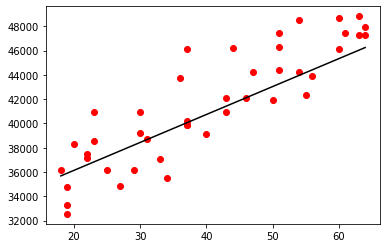

In [848]:
lnregr1 = linear_model.LinearRegression().fit(x_train1, y_train1)
y_pred1 = lnregr1.predict(x1)
plt.scatter(x_test1, y_test1, color="red")
plt.plot(x1, y_pred1, color="black")

In [849]:
rmse(y_test1, lnregr1.predict(x_test1)), r2_score(y_test1, lnregr1.predict(x_test1)), mean_absolute_error(y_test1, lnregr1.predict(x_test1))

(48.99402820515136, 0.7295211427725392, 1897.9096584375102)

2. Non-linear Regression

In [850]:
def sigmoid1(x, a, b):
  y = a*x**2+b
  return y
popt1, pcov1 = curve_fit(sigmoid1, x_train1.reshape(-1), y_train1)
popt1

array([2.83654032e+00, 3.56223051e+04])

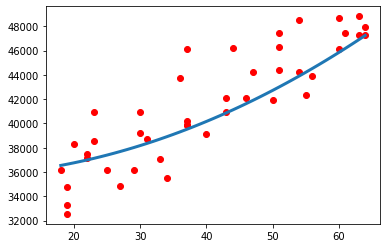

In [851]:
y1 = sigmoid1(x1, *popt1)
plt.scatter(x_test1, y_test1, color="red")
plt.plot(x1, y1, linewidth = 3.0)

In [852]:
rmse(y_test1, sigmoid1(x_test1, *popt1)), r2_score(y_test1, sigmoid1(x_test1, *popt1)), mean_absolute_error(y_test1, sigmoid1(x_test1, *popt1))

(49.505337232499066, 0.7180521257696155, 1858.0798593144864)

3. Comparison

In [874]:
comparison_dt1 = {"Linear Regression":(rmse(y_test1, lnregr1.predict(x_test1)), r2_score(y_test1, lnregr1.predict(x_test1)), mean_absolute_error(y_test1, lnregr1.predict(x_test1))),
        "Non-Linear Regression":(rmse(y_test1, sigmoid1(x_test1, *popt1)), r2_score(y_test1, sigmoid1(x_test1, *popt1)), mean_absolute_error(y_test1, sigmoid1(x_test1, *popt1)))}
comparison1 = pd.DataFrame(comparison_dt1)
comparison1.index = ["rmse", "r2_score", "mae"]
comparison1

,Linear Regression,Non-Linear Regression
rmse,48.994028,49.505337
r2_score,0.729521,0.718052
mae,1897.909658,1858.079859


Smoker with Charges <= 30000

In [853]:
smoker_df2 = smoker_df[smoker_df["charges"]<=30000]

In [854]:
smoker_x2, smoker_y2 = smoker_df2.age.values.reshape(-1, 1), smoker_df2.charges.values

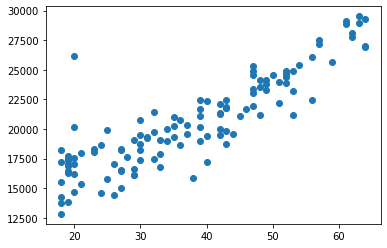

In [855]:
plt.scatter(smoker_x2, smoker_y2)

In [856]:
dataset2 = np.concatenate((smoker_x2, smoker_y2.reshape(-1, 1)), axis=1)

In [861]:
np.random.shuffle(dataset2)
sfdt2 = np.array_split(dataset2, 10)

In [862]:
train2 = np.concatenate(sfdt2[:7])
test2 = np.concatenate(sfdt2[7:])
x_train2, y_train2 = train2[:, :1], train2[:, 1]
x_test2, y_test2 = test2[:, :1], test2[:, 1]
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape

((86, 1), (86,), (36, 1), (36,))

In [876]:
x2 = np.arange(min(smoker_x2), max(smoker_x2)+1, 1)
x2 = x2.reshape(-1, 1)

1. Linear Regression

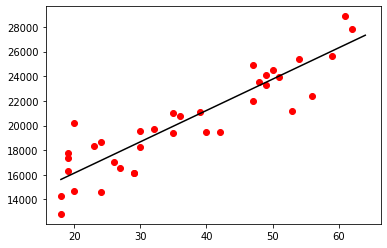

In [864]:
lnregr2 = linear_model.LinearRegression().fit(x_train2, y_train2)
y_pred2 = lnregr2.predict(x2)
plt.scatter(x_test2, y_test2, color="red")
plt.plot(x2, y_pred2, color="black")

In [865]:
rmse(y_test2, lnregr2.predict(x_test2)), r2_score(y_test2, lnregr2.predict(x_test2)), mean_absolute_error(y_test2, lnregr2.predict(x_test2))

(40.863192267909014, 0.814420504486087, 1356.6941877941522)

2. Non-linear Regression

In [866]:
popt2, pcov2 = curve_fit(sigmoid1, x_train2.reshape(-1), y_train2)
popt2

array([3.26224606e+00, 1.54310144e+04])

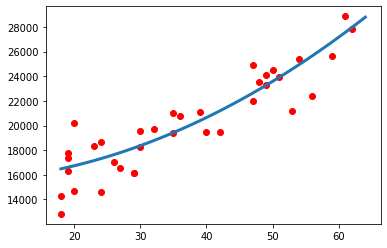

In [867]:
y2 = sigmoid1(x2, *popt2)
plt.scatter(x_test2, y_test2, color="red")
plt.plot(x2, y2, linewidth = 3.0)

In [870]:
rmse(y_test2, sigmoid1(x_test2, *popt2)), r2_score(y_test2, sigmoid1(x_test2, *popt2)), mean_absolute_error(y_test2, sigmoid1(x_test2, *popt2))

(40.87074118894857, 0.8142833332930315, 1341.0631764987027)

3. Comparion

In [875]:
comparison_dt2 = {"Linear Regression":(rmse(y_test2, lnregr2.predict(x_test2)), r2_score(y_test2, lnregr2.predict(x_test2)), mean_absolute_error(y_test2, lnregr2.predict(x_test2))),
        "Non-Linear Regression":(rmse(y_test2, sigmoid1(x_test2, *popt2)), r2_score(y_test2, sigmoid1(x_test2, *popt2)), mean_absolute_error(y_test2, sigmoid1(x_test2, *popt2)))}
comparison2 = pd.DataFrame(comparison_dt2)
comparison2.index = ["rmse", "r2_score", "mae"]
comparison2

,Linear Regression,Non-Linear Regression
rmse,40.863192,40.870741
r2_score,0.814421,0.814283
mae,1356.694188,1341.063176
